In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df2 = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Submissions/score/done/date_c2_db.csv')

In [4]:
df = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Submissions/score/date_c1_db.csv')

In [71]:
df.head()

,Date,Anti_Vax,Neutral,Pro_vax,total
2,2020-03-01,204.0,2595.0,72.0,2871.0
3,2020-03-02,229.0,3329.0,66.0,3624.0
4,2020-03-03,220.0,3876.0,89.0,4185.0
5,2020-03-04,272.0,3617.0,102.0,3991.0
6,2020-03-05,264.0,3800.0,76.0,4140.0


In [5]:
df2= df2.drop([0,1],axis=0)

In [7]:
df.rename(columns={'Unnamed: 0':'Date', 'score': 'Non-Covid', 'score.1': 'Covid'}, inplace=True)

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df= df.drop([0,1],axis=0)

In [38]:
df2.sum()

Date         2020-03-012020-03-022020-03-032020-03-042020-0...
Non-Covid                                           23183417.0
Covid                                                3049424.0
dtype: object

In [55]:
df.sum()

Unnamed: 0    2020-03-012020-03-022020-03-032020-03-042020-0...
score                                                  421328.0
score.1                                               2364642.0
score.2                                                196185.0
dtype: object

In [9]:
df['total'] = df['Covid'] + df['Non-Covid']

In [10]:
df2.rename(columns={'Unnamed: 0':'Date', 'score': 'Anti_Vax', 'score.1': 'Neutral', 'score.2': 'Pro_vax'}, inplace=True)

In [11]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [12]:
df2['total'] = df2['Anti_Vax'] + df2['Neutral'] + df2['Pro_vax']

In [13]:
df2['p_pro'] = df2['Pro_vax'] / df2['total']
df2['p_ne'] = df2['Neutral'] / df2['total']
df2['p_ant'] = df2['Anti_Vax'] / df2['total']

In [83]:
df.head()

,Date,Anti_Vax,Neutral,Pro_vax,total,p_pro,p_ne,p_ant
2,2020-03-01,204.0,2595.0,72.0,2871.0,0.025078,0.903866,0.071055
3,2020-03-02,229.0,3329.0,66.0,3624.0,0.018212,0.918598,0.063190
4,2020-03-03,220.0,3876.0,89.0,4185.0,0.021266,0.926165,0.052569
5,2020-03-04,272.0,3617.0,102.0,3991.0,0.025558,0.906289,0.068153
6,2020-03-05,264.0,3800.0,76.0,4140.0,0.018357,0.917874,0.063768


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


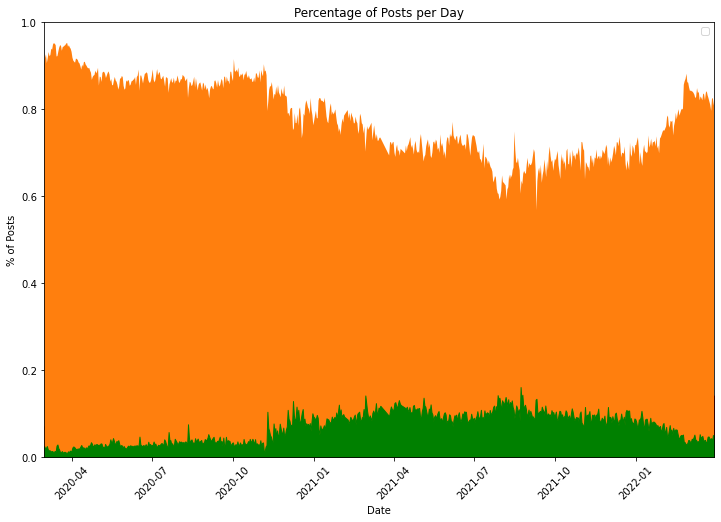

In [92]:
plt.figure(figsize=(12,8))
# plt.stackplot(df['Date'], df['p_ant'],  color='r')
# plt.stackplot(df['Date'], df['p_ne'], )
# plt.stackplot(df['Date'], df['p_pro'],  color='g')

# plt.plot(df['Date'], df['total'], label='Total Posts')
# plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.title('Percentage of Posts per Day')
plt.xlabel('Date')
plt.ylabel('% of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.legend()

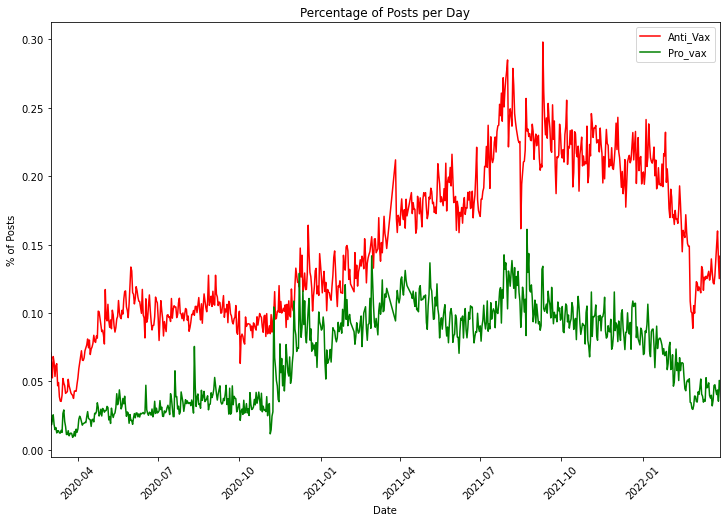

In [274]:
plt.figure(figsize=(12,8))
plt.plot(df2['Date'], df2['p_ant'], label='Anti_Vax', color='r')
# plt.plot(df['Date'], df['p_ne'], label='Neutral')
plt.plot(df2['Date'], df2['p_pro'], label='Pro_vax', color='g')

# plt.plot(df['Date'], df['total'], label='Total Posts')
# plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.title('Percentage of Posts per Day')
plt.xlabel('Date')
plt.ylabel('% of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.legend()

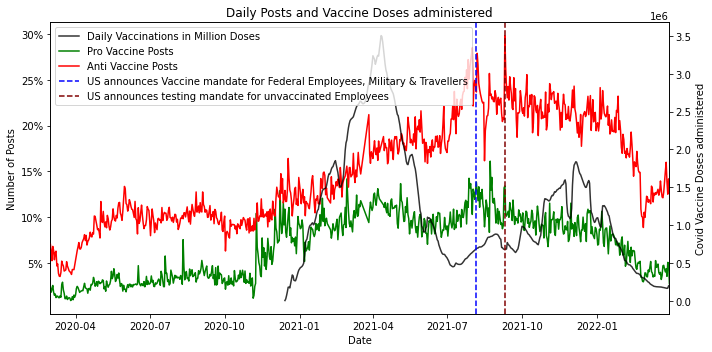

In [307]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx() 
# plt.plot(df['Date'], df2['Covid'], label='Covid')
line1, = ax2.plot(us_vacc['date_'], us_vacc['new_vaccinations_smoothed'], color='black', zorder=0, alpha=0.8, label='Daily Vaccinations in Million Doses')
ax2.set_ylabel('Covid Vaccine Doses administered')
ax1.set_title('Daily Posts and Vaccine Doses administered')
line2, = ax1.plot(df2['Date'], df2['p_pro'], zorder=8, label='Pro Vaccine Posts', color='green')
line3, = ax1.plot(df2['Date'], df2['p_ant'], zorder=8, label='Anti Vaccine Posts', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Posts')
# ax1.set_yticks(ticks=[200, 400, 600, 800, 1000, 1200], labels=['200', '400', '600', '800', '1,000', '1,200'])
ax1.set_yticks(ticks=[ 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], labels=['5%', '10%', '15%', '20%', '25%', '30%'])
ax1.set_xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
# ax2.set_xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    # datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=45)
# ax1.set_xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    # datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=45)
# plt.yticks(ticks=(2000, 4000, 6000, 8000, 10000, 12000), labels=("{:,}".format(2000), "{:,}".format(4000), "{:,}".format(6000), "{:,}".format(8000), "{:,}".format(10000), "{:,}".format(12000)))
# plt.axvline(x=datetime(2020,3,13).date(), color='red', linestyle='--', label=' US Pres. Trump declares Covid-19 a National Emergency')
# plt.axvline(x=datetime(2020,10,2).date(), color='orange', linestyle='--', label='US Pres. Trump announces Covid-19 infection')
# plt.axvline(x=datetime(2020,11,11).date(), color='pink', linestyle='--', label='Pfizer announces Covid-19 vaccine')
# plt.axvline(x=datetime(2021,1,6).date(), color='green', linestyle='--', label='Jan 06th Insurrection')
# plt.axvline(x=datetime(2021,1,28).date(), color='aqua', linestyle='--', label='$GME Stock Trade Restrictions')
# plt.axvline(x=datetime(2021,7,29).date(), color='blue', linestyle=':', label='?')
line4 = plt.axvline(x=datetime(2021,8,5).date(), color='blue', linestyle='--', label='US announces Vaccine mandate for Federal Employees, Military & Travellers')
line5 = plt.axvline(x=datetime(2021,9,10).date(), color='maroon', linestyle='--', label='US announces testing mandate for unvaccinated Employees')
# plt.axvline(x=datetime(2021,8,10).date(), color='red', linestyle=':', label='NY Governor Andrew Cuomo resigns')
# plt.axvline(x=datetime(2022,1,11).date(), color='red', linestyle=':', label='WHO warns that half of Europe could catch Covid-19 by within weeks')
# plt.axvline(x=datetime(2022,2,25).date(), color='red', linestyle=':', label='Russian Invasion of Ukraine')
fig.tight_layout()
plt.legend(handles=[line1, line2, line3, line4, line5], loc='upper left')

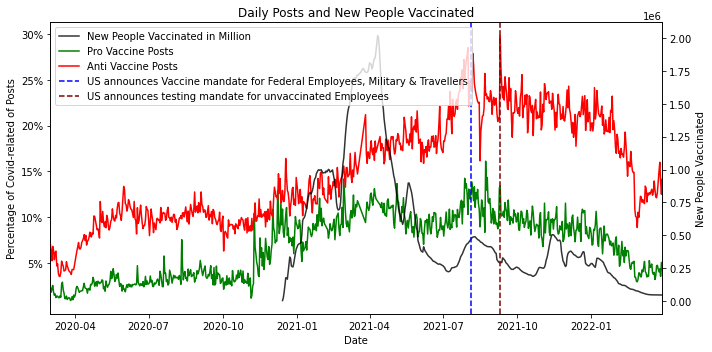

In [302]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx() 
# plt.plot(df['Date'], df2['Covid'], label='Covid')
line1, = ax2.plot(us_vacc['date_'], us_vacc['new_people_vaccinated_smoothed'], color='black', zorder=0, alpha=0.8, label='New People Vaccinated in Million')
ax2.set_ylabel('New People Vaccinated')
ax1.set_title('Daily Posts and New People Vaccinated')
line2, = ax1.plot(df2['Date'], df2['p_pro'], zorder=8, label='Pro Vaccine Posts', color='green')
line3, = ax1.plot(df2['Date'], df2['p_ant'], zorder=8, label='Anti Vaccine Posts', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage of Covid-related of Posts')
ax1.set_yticks(ticks=[ 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], labels=['5%', '10%', '15%', '20%', '25%', '30%'])

ax1.set_xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
# ax2.set_xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    # datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=45)
# ax1.set_xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    # datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=45)
# plt.yticks(ticks=(2000, 4000, 6000, 8000, 10000, 12000), labels=("{:,}".format(2000), "{:,}".format(4000), "{:,}".format(6000), "{:,}".format(8000), "{:,}".format(10000), "{:,}".format(12000)))
# plt.axvline(x=datetime(2020,3,13).date(), color='red', linestyle='--', label=' US Pres. Trump declares Covid-19 a National Emergency')
# plt.axvline(x=datetime(2020,10,2).date(), color='orange', linestyle='--', label='US Pres. Trump announces Covid-19 infection')
# plt.axvline(x=datetime(2020,11,11).date(), color='pink', linestyle='--', label='Pfizer announces Covid-19 vaccine')
# plt.axvline(x=datetime(2021,1,6).date(), color='green', linestyle='--', label='Jan 06th Insurrection')
# plt.axvline(x=datetime(2021,1,28).date(), color='aqua', linestyle='--', label='$GME Stock Trade Restrictions')
# plt.axvline(x=datetime(2021,7,29).date(), color='blue', linestyle=':', label='?')
line4 = plt.axvline(x=datetime(2021,8,5).date(), color='blue', linestyle='--', label='US announces Vaccine mandate for Federal Employees, Military & Travellers')
line5 = plt.axvline(x=datetime(2021,9,10).date(), color='maroon', linestyle='--', label='US announces testing mandate for unvaccinated Employees')
# plt.axvline(x=datetime(2021,8,10).date(), color='red', linestyle=':', label='NY Governor Andrew Cuomo resigns')
# plt.axvline(x=datetime(2022,1,11).date(), color='red', linestyle=':', label='WHO warns that half of Europe could catch Covid-19 by within weeks')
# plt.axvline(x=datetime(2022,2,25).date(), color='red', linestyle=':', label='Russian Invasion of Ukraine')
fig.tight_layout()
plt.legend(handles=[line1, line2, line3, line4, line5], loc='upper left')

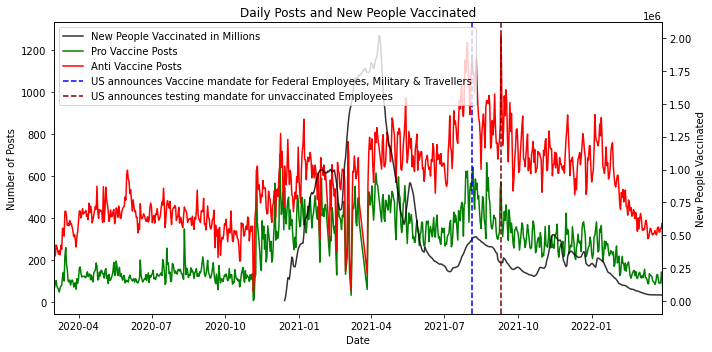

In [301]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx() 
# plt.plot(df['Date'], df2['Covid'], label='Covid')
line1, = ax2.plot(us_vacc['date_'], us_vacc['new_people_vaccinated_smoothed'], color='black', zorder=0, alpha=0.8, label='New People Vaccinated in Millions')
ax2.set_ylabel('New People Vaccinated')
ax1.set_title('Daily Posts and New People Vaccinated')
line2, = ax1.plot(df2['Date'], df2['Pro_vax'], zorder=8, label='Pro Vaccine Posts', color='green')
line3, = ax1.plot(df2['Date'], df2['Anti_Vax'], zorder=8, label='Anti Vaccine Posts', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Posts')
# ax1.set_yticks(ticks=[2000, 4000, 6000, 8000, 10000], labels=['2,000', '4,000', '6,000', '8,000', '10,000'])

ax1.set_xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
# ax2.set_xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    # datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=45)
# ax1.set_xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    # datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=45)
# plt.yticks(ticks=(2000, 4000, 6000, 8000, 10000, 12000), labels=("{:,}".format(2000), "{:,}".format(4000), "{:,}".format(6000), "{:,}".format(8000), "{:,}".format(10000), "{:,}".format(12000)))
# plt.axvline(x=datetime(2020,3,13).date(), color='red', linestyle='--', label=' US Pres. Trump declares Covid-19 a National Emergency')
# plt.axvline(x=datetime(2020,10,2).date(), color='orange', linestyle='--', label='US Pres. Trump announces Covid-19 infection')
# plt.axvline(x=datetime(2020,11,11).date(), color='pink', linestyle='--', label='Pfizer announces Covid-19 vaccine')
# plt.axvline(x=datetime(2021,1,6).date(), color='green', linestyle='--', label='Jan 06th Insurrection')
# plt.axvline(x=datetime(2021,1,28).date(), color='aqua', linestyle='--', label='$GME Stock Trade Restrictions')
# plt.axvline(x=datetime(2021,7,29).date(), color='blue', linestyle=':', label='?')
line4 = plt.axvline(x=datetime(2021,8,5).date(), color='blue', linestyle='--', label='US announces Vaccine mandate for Federal Employees, Military & Travellers')
line5 = plt.axvline(x=datetime(2021,9,10).date(), color='maroon', linestyle='--', label='US announces testing mandate for unvaccinated Employees')
# plt.axvline(x=datetime(2021,8,10).date(), color='red', linestyle=':', label='NY Governor Andrew Cuomo resigns')
# plt.axvline(x=datetime(2022,1,11).date(), color='red', linestyle=':', label='WHO warns that half of Europe could catch Covid-19 by within weeks')
# plt.axvline(x=datetime(2022,2,25).date(), color='red', linestyle=':', label='Russian Invasion of Ukraine')
fig.tight_layout()
plt.legend(handles=[line1, line2, line3, line4, line5], loc='upper left')

In [88]:
df[df['p_pro'] >0.15 ]

,Date,Anti_Vax,Neutral,Pro_vax,total,p_pro,p_ne,p_ant
524,2021-08-23,960.0,2496.0,664.0,4120.0,0.161165,0.605825,0.23301


In [199]:
vacc = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Literature/owid-covid-data.csv')

In [193]:
vacc.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [210]:
vacc.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                               object
total_cases                                       float64
                                                ...      
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
date_                                      datetime64[ns]
Length: 68, dtype: object

In [200]:
vacc['date_'] = pd.to_datetime(vacc['date'], )

In [211]:
vacc['date_'].min()

Timestamp('2020-01-01 00:00:00')

In [219]:
us_vacc = vacc[(vacc['iso_code'] == 'USA') & (vacc['date_'] > '2020-3-1') & (vacc['date_'] < '2022-3-31')]

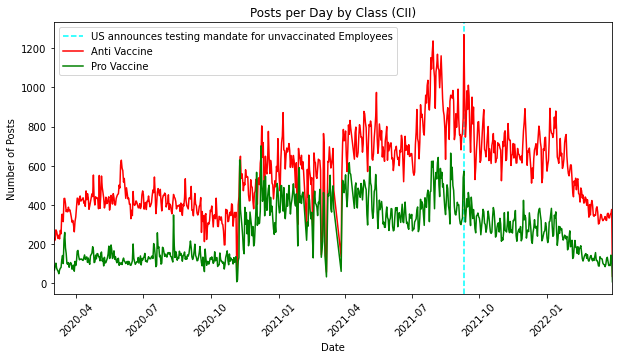

In [282]:
plt.figure(figsize=(10,5))


# plt.axvline(x=datetime(2020,3,13).date(), color='orange', linestyle='--', label='US Pres. Trump declares Covid-19 a National Emergency')
# plt.axvline(x=datetime(2020,11,11).date(), color='pink', linestyle='--', label='Pfizer announces Covid-19 vaccine')
# plt.axvline(x=datetime(2020,12,8).date(), color='orange', linestyle='--', label='UK starts vaccinating for Covid-19')
# plt.axvline(x=datetime(2021,8,5).date(), color='plum', linestyle='--', label='US announces Vaccine mandate for Federal Employees, Military & Travellers')
plt.axvline(x=datetime(2021,9,10).date(), color='aqua', linestyle='--', label='US announces testing mandate for unvaccinated Employees')
# plt.axvline(x=datetime(2022,1,13).date(), color='grey', linestyle='--', label='US SC stops OSHA vaccine mandate')
plt.title('Posts per Day by Class (CII)')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.plot(df2['Date'], df2['Anti_Vax'], label='Anti Vaccine', color='r')
# plt.plot(df2['Date'], df2['Neutral'], label='Neutral')
plt.plot(df2['Date'], df2['Pro_vax'], label='Pro Vaccine', color='g')
plt.legend()

In [184]:

df2[(df2['Anti_Vax'] > 800) & (df['Date'] > datetime(2021,10,10))] 

,Date,Anti_Vax,Neutral,Pro_vax,total,p_pro,p_ne,p_ant
602,2021-11-09,815.0,2259.0,364.0,3438.0,0.105876,0.657068,0.237056
624,2021-12-01,822.0,2563.0,323.0,3708.0,0.087109,0.691208,0.221683
625,2021-12-02,891.0,2494.0,346.0,3731.0,0.092737,0.668453,0.238810
626,2021-12-03,802.0,2519.0,333.0,3654.0,0.091133,0.689381,0.219485
644,2021-12-21,802.0,2280.0,376.0,3458.0,0.108733,0.659341,0.231926
659,2022-01-05,893.0,2489.0,317.0,3699.0,0.085699,0.672885,0.241417
665,2022-01-11,848.0,2827.0,347.0,4022.0,0.086275,0.702884,0.210840
667,2022-01-13,879.0,2882.0,364.0,4125.0,0.088242,0.698667,0.213091


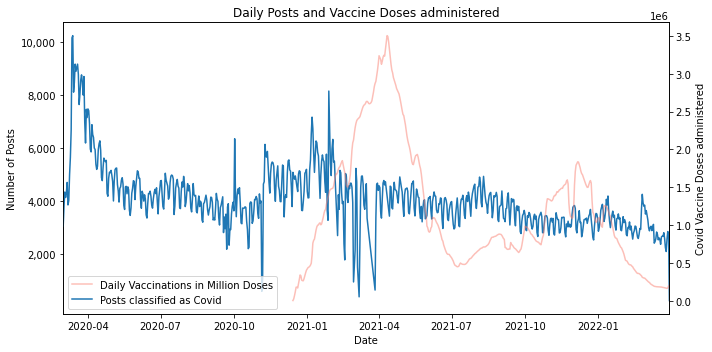

In [305]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx() 
# plt.plot(df['Date'], df2['Covid'], label='Covid')
line1, = ax2.plot(us_vacc['date_'], us_vacc['new_vaccinations_smoothed'], color='salmon', zorder=0, alpha=0.5, label='Daily Vaccinations in Million Doses')
ax2.set_ylabel('Covid Vaccine Doses administered')
ax1.set_title('Daily Posts and Vaccine Doses administered')
line2, = ax1.plot(df['Date'], df['Covid'], zorder=8, label='Posts classified as Covid')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Posts')
ax1.set_yticks(ticks=[2000, 4000, 6000, 8000, 10000], labels=['2,000', '4,000', '6,000', '8,000', '10,000'])

ax1.set_xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
# ax2.set_xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    # datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=45)
# ax1.set_xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    # datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=45)
# plt.yticks(ticks=(2000, 4000, 6000, 8000, 10000, 12000), labels=("{:,}".format(2000), "{:,}".format(4000), "{:,}".format(6000), "{:,}".format(8000), "{:,}".format(10000), "{:,}".format(12000)))
# plt.axvline(x=datetime(2020,3,13).date(), color='red', linestyle='--', label=' US Pres. Trump declares Covid-19 a National Emergency')
# plt.axvline(x=datetime(2020,10,2).date(), color='orange', linestyle='--', label='US Pres. Trump announces Covid-19 infection')
# plt.axvline(x=datetime(2020,11,11).date(), color='pink', linestyle='--', label='Pfizer announces Covid-19 vaccine')
# plt.axvline(x=datetime(2021,1,6).date(), color='green', linestyle='--', label='Jan 06th Insurrection')
# plt.axvline(x=datetime(2021,1,28).date(), color='aqua', linestyle='--', label='$GME Stock Trade Restrictions')
# plt.axvline(x=datetime(2021,7,29).date(), color='blue', linestyle=':', label='?')
# plt.axvline(x=datetime(2021,8,5).date(), color='khaki', linestyle='--', label='US announces Vaccine mandate for Federal Employees, Military & Travellers')
# plt.axvline(x=datetime(2021,8,10).date(), color='red', linestyle=':', label='NY Governor Andrew Cuomo resigns')
# plt.axvline(x=datetime(2022,1,11).date(), color='red', linestyle=':', label='WHO warns that half of Europe could catch Covid-19 by within weeks')
# plt.axvline(x=datetime(2022,2,25).date(), color='red', linestyle=':', label='Russian Invasion of Ukraine')
fig.tight_layout()
plt.legend(handles=[line1, line2], loc='lower left')

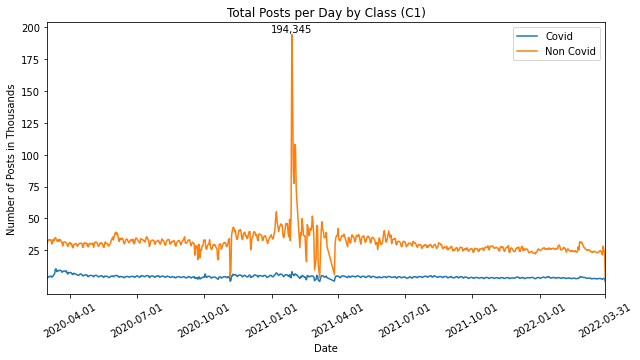

In [47]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Covid'], label='Covid')
plt.plot(df['Date'], df['Non-Covid'], label='Non Covid')
# plt.plot(df['Date'], df2['Covid'], label='Covid')

# plt.plot(df2['Date'], df2['total'], label='Total Posts')
# plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.title('Total Posts per Day by Class (C1)')
plt.xlabel('Date')
plt.ylabel('Number of Posts in Thousands')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=30)
plt.yticks(ticks=(25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000), labels=(25, 50, 75, 100, 125, 150, 175, 200))
plt.text(datetime(2021,1,28).date(), 196500, "{:,}".format(194345), ha = 'center')
plt.legend()

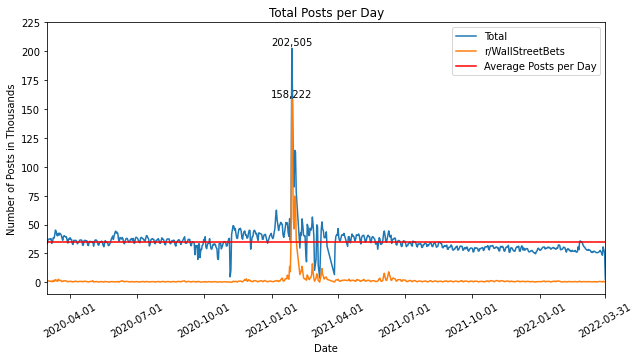

In [91]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['total'], label='Total')
# plt.plot(df['Date'], df['Non-Covid'], label='Non Covid')
# plt.plot(df['Date'], df2['Covid'], label='Covid')
plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.plot(df['Date'], list([35000 for i in range(743)]), label= 'Average Posts per Day', color='r')
# plt.plot(df2['Date'], df2['total'], label='Total Posts')
# plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.title('Total Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts in Thousands')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=30)
plt.yticks(ticks=(0,25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000), labels=(0, 25, 50, 75, 100, 125, 150, 175, 200, 225))
plt.text(datetime(2021,1,28).date(), 205000, "{:,}".format(202505), ha = 'center')
plt.text(datetime(2021,1,28).date(), 160000, "{:,}".format(158222), ha = 'center')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


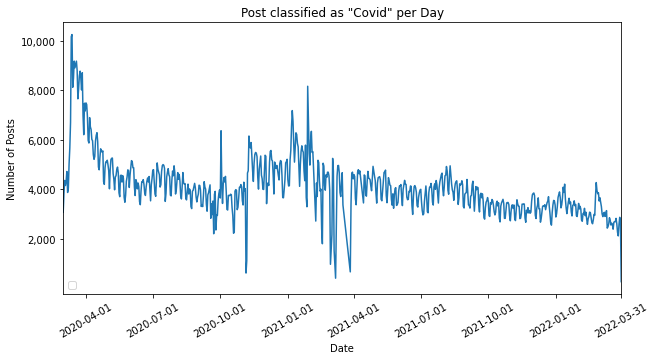

In [156]:
plt.figure(figsize=(10,5))
# plt.plot(df['Date'], df['Covid'], label='')

# plt.plot(df['Date'], df2['Covid'], label='Covid')

plt.title('Post classified as "Covid" per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(ticks=( datetime(2020,4,1).date(), datetime(2020,7,1).date(), datetime(2020,10,1).date(), datetime(2021,1,1).date(), datetime(2021,4,1).date(), \
    datetime(2021,7,1).date(), datetime(2021,10,1).date(), datetime(2022,1,1).date(), datetime(2022,3,31).date()), rotation=30)
plt.yticks(ticks=(2000, 4000, 6000, 8000, 10000, 12000), labels=("{:,}".format(2000), "{:,}".format(4000), "{:,}".format(6000), "{:,}".format(8000), "{:,}".format(10000), "{:,}".format(12000)))
# plt.axvline(x=datetime(2020,3,13).date(), color='red', linestyle='--', label=' US Pres. Trump declares Covid-19 a National Emergency')
# plt.axvline(x=datetime(2020,10,2).date(), color='orange', linestyle='--', label='US Pres. Trump announces Covid-19 infection')
# plt.axvline(x=datetime(2020,11,11).date(), color='pink', linestyle='--', label='Pfizer announces Covid-19 vaccine')
# plt.axvline(x=datetime(2021,1,6).date(), color='green', linestyle='--', label='Jan 06th Insurrection')
# plt.axvline(x=datetime(2021,1,28).date(), color='aqua', linestyle='--', label='$GME Stock Trade Restrictions')
# plt.axvline(x=datetime(2021,7,29).date(), color='blue', linestyle=':', label='?')
# plt.axvline(x=datetime(2021,8,5).date(), color='khaki', linestyle='--', label='US announces Vaccine mandate for Federal Employees, Military & Travellers')
# plt.axvline(x=datetime(2021,8,10).date(), color='red', linestyle=':', label='NY Governor Andrew Cuomo resigns')
# plt.axvline(x=datetime(2022,1,11).date(), color='red', linestyle=':', label='WHO warns that half of Europe could catch Covid-19 by within weeks')
# plt.axvline(x=datetime(2022,2,25).date(), color='red', linestyle=':', label='Russian Invasion of Ukraine')
plt.plot(df['Date'], df['Covid'],  label='')
plt.legend(loc='lower left')

In [142]:
df[(df['Covid'] > 4000 ) & (df['Date'] > datetime(2021,10,6))] 

,Date,Non-Covid,Covid,total
665,2022-01-11,25725.0,4077.0,29802.0
667,2022-01-13,25668.0,4200.0,29868.0
710,2022-02-25,31572.0,4264.0,35836.0


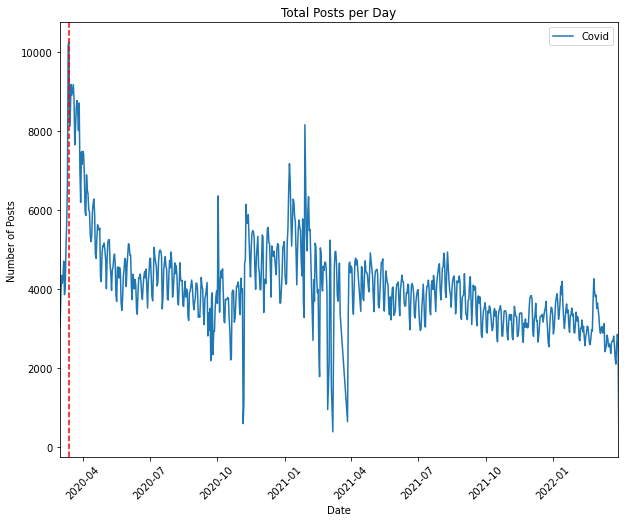

In [105]:
plt.figure(figsize=(10,8))
# plt.plot(df2['Date'], df2['Non-Covid'], label='Non Covid')
plt.plot(df['Date'], df['Covid'], label='Covid')

# plt.plot(df2['Date'], df2['total'], label='Total Posts')
# plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.title('Total Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.axvline(x=datetime(2020,3,13).date(), color='red', linestyle='--')
plt.legend()

In [52]:
df2[df2['Covid'] > 6000]

,Date,Non-Covid,Covid,total
12,2020-03-11,33943.0,6697.0,40640.0
13,2020-03-12,34980.0,10169.0,45149.0
14,2020-03-13,33943.0,10251.0,44194.0
15,2020-03-14,32500.0,8119.0,40619.0
16,2020-03-15,31738.0,8485.0,40223.0
17,2020-03-16,33273.0,9177.0,42450.0
18,2020-03-17,31933.0,8906.0,40839.0
19,2020-03-18,33482.0,9049.0,42531.0
20,2020-03-19,32575.0,9176.0,41751.0
21,2020-03-20,32087.0,8791.0,40878.0


In [32]:
df[df['total'] < 10000]

,Date,Anti_Vax,Neutral,Pro_vax,total
251,2020-11-05,640.0,3932.0,124.0,4696.0
363,2021-02-28,1877.0,7048.0,489.0,9414.0
368,2021-03-07,577.0,2834.0,151.0,3562.0
379,2021-03-27,1066.0,4993.0,317.0,6376.0
744,2022-03-31,621.0,1910.0,178.0,2709.0


In [53]:
wsb = pd.read_pickle('../../Files/Submissions/score/d_wallstreetbets.pickle')

In [54]:
from datetime import datetime
wsb['date'] = pd.to_datetime([datetime.fromtimestamp(f) for f in wsb['created_utc']]).date

In [70]:
agg = wsb.groupby(['date', 'pred_1'], as_index=False).num_comments.count()

In [71]:
agg.head()

,date,pred_1,num_comments
0,2020-03-01,0.0,421
1,2020-03-01,1.0,104
2,2020-03-01,2.0,185
3,2020-03-02,0.0,701
4,2020-03-02,1.0,282


In [72]:
agg = agg.pivot(index='date',columns='pred_1')

In [75]:
agg.head()

,num_comments,num_comments,num_comments
date,,,
2020-03-01,421,104,185
2020-03-02,701,282,297
2020-03-03,668,290,286
2020-03-04,460,156,206
2020-03-05,507,164,232


In [74]:
agg.columns = agg.columns.droplevel(1)

In [76]:
agg.columns = ['Anti_Vax', 'Neutral', 'Pro_vax']

In [77]:
agg['total'] = agg['Anti_Vax'] + agg['Neutral'] + agg['Pro_vax']

In [78]:
agg[agg['total'] == agg['total'].max() ]

,Anti_Vax,Neutral,Pro_vax,total
date,,,,
2021-01-28,59495,35510,63217,158222


In [79]:
agg['date'] = agg.index

In [80]:
agg = agg.append({'date': datetime(2022, 3, 31).date(), 'Anti_Vax': 0, 'Neutral': 0, 'Pro_vax': 0, 'total': 0}, ignore_index=True)

/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_45496/4233603014.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agg = agg.append({'date': datetime(2022, 3, 31).date(), 'Anti_Vax': 0, 'Neutral': 0, 'Pro_vax': 0, 'total': 0}, ignore_index=True)


In [66]:
agg.reset_index(inplace=True)

In [81]:
agg.tail()

,Anti_Vax,Neutral,Pro_vax,total,date
738,210,57,68,335,2022-03-27
739,377,134,147,658,2022-03-28
740,484,166,196,846,2022-03-29
741,332,92,152,576,2022-03-30
742,0,0,0,0,2022-03-31


In [82]:
df2 = df.copy()

In [71]:
agg[(agg['date']> datetime(2021,1,20 ).date()) & (agg['date']< datetime(2021,2,5 ).date())]

,date,Anti_Vax,Neutral,Pro_vax,total
326,2021-01-21,1676,681,714,3071
327,2021-01-22,3075,1628,1508,6211
328,2021-01-23,2035,859,862,3756
329,2021-01-24,1495,617,607,2719
330,2021-01-25,6339,3477,3906,13722
331,2021-01-26,4406,2271,2408,9085
332,2021-01-27,15221,9269,16092,40582
333,2021-01-28,59495,35510,63217,158222
334,2021-01-29,46043,27872,43627,117542
335,2021-01-30,22963,13582,19997,56542


In [72]:
agg[(agg['date']> datetime(2020,12,25 ).date()) & (agg['date']< datetime(2021,1,25 ).date())].mean()

/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_8268/3571848669.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  agg[(agg['date']> datetime(2020,12,25 ).date()) & (agg['date']< datetime(2021,1,25 ).date())].mean()


Anti_Vax     944.466667
Neutral      373.100000
Pro_vax      413.966667
total       1731.533333
dtype: float64

In [148]:
df2[(df2['Date']> datetime(2021,1,25 )) & (df2['Date']< datetime(2021,2,3 ))]

,index,Date,Anti_Vax,Neutral,Pro_vax,total,min_anti
331,333,2021-01-26,18173.0,13258.0,3126.0,34557.0,4406
332,334,2021-01-27,23888.0,15840.0,16512.0,56240.0,15221
333,335,2021-01-28,81891.0,53463.0,64516.0,199870.0,59495
334,336,2021-01-29,67179.0,45309.0,44743.0,157231.0,46043
335,337,2021-01-30,40938.0,28896.0,21039.0,90873.0,22963
336,338,2021-01-31,36758.0,27024.0,16036.0,79818.0,19374
337,339,2021-02-01,47199.0,33056.0,31156.0,111411.0,27795
338,340,2021-02-02,48676.0,33059.0,28498.0,110233.0,28379


In [83]:
df2.reset_index(inplace=True)

In [85]:
df2.drop('index',axis=1, inplace=True)

In [86]:
df2.head(10)

,Date,Anti_Vax,Neutral,Pro_vax,total,date
0,2020-03-01,14715.0,15977.0,772.0,31464.0,2
1,2020-03-02,16899.0,17022.0,919.0,34840.0,3
2,2020-03-03,17629.0,16655.0,1016.0,35300.0,4
3,2020-03-04,18059.0,16432.0,1067.0,35558.0,5
4,2020-03-05,17683.0,16402.0,1024.0,35109.0,6
5,2020-03-06,18097.0,16681.0,1011.0,35789.0,7
6,2020-03-07,15229.0,15537.0,654.0,31420.0,8
7,2020-03-08,15579.0,16304.0,701.0,32584.0,9
8,2020-03-09,18122.0,17216.0,1070.0,36408.0,10
9,2020-03-10,18358.0,16591.0,1058.0,36007.0,11


In [87]:
df2.drop(columns=('date'), inplace=True)

In [145]:
df2['min_anti'] = agg['Anti_Vax']

In [88]:
agg.head()

,date,Anti_Vax,Neutral,Pro_vax,total
0,2020-03-01,421,104,185,710
1,2020-03-02,701,282,297,1280
2,2020-03-03,668,290,286,1244
3,2020-03-04,460,156,206,822
4,2020-03-05,507,164,232,903


In [89]:
df2['Anti_Vax'] = df2['Anti_Vax'] - agg['Anti_Vax']

In [90]:
df2['Pro_vax'] = df2['Pro_vax'] - agg['Pro_vax']

In [91]:
df2['total'] = df2['total'] - agg['total']

In [15]:
df.head()

,Date,Anti_Vax,Neutral,Pro_vax,total
2,2020-03-01,5802.0,25587.0,1492.0,32881.0
3,2020-03-02,5603.0,28479.0,1485.0,35567.0
4,2020-03-03,5647.0,28952.0,1516.0,36115.0
5,2020-03-04,5821.0,29313.0,1569.0,36703.0
6,2020-03-05,5916.0,28932.0,1485.0,36333.0


Text(0.5, 1.0, 'Posts by Classification and Day')

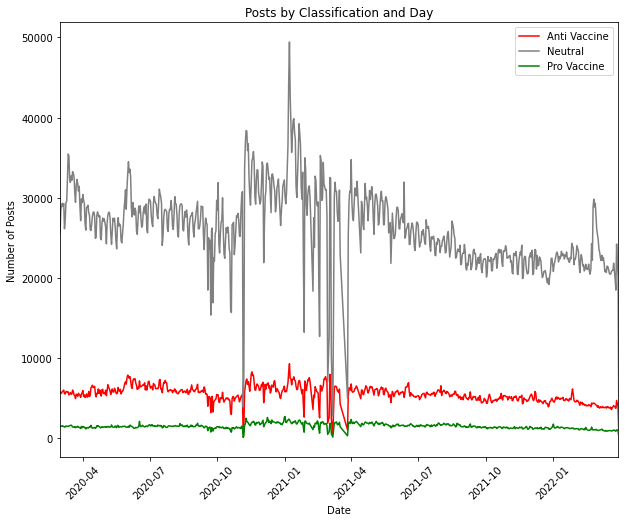

In [16]:
plt.figure(figsize=(10,8))
plt.plot(df['Date'], df['Anti_Vax'], label='Anti Vaccine', color='red')
plt.plot(df['Date'], df['Neutral'], label='Neutral', color='grey')
plt.plot(df['Date'], df['Pro_vax'], label='Pro Vaccine', color='green')
# plt.plot(df2['Date'], df2['total'], label='Total')
plt.ylim=(0,60000)
plt.xlim(datetime(2020, 3,1).date(),datetime(2022, 3,29).date())
plt.xticks(rotation=-45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.title('Posts by Classification and Day')

Text(0.5, 1.0, 'Posts by Classification and Day')

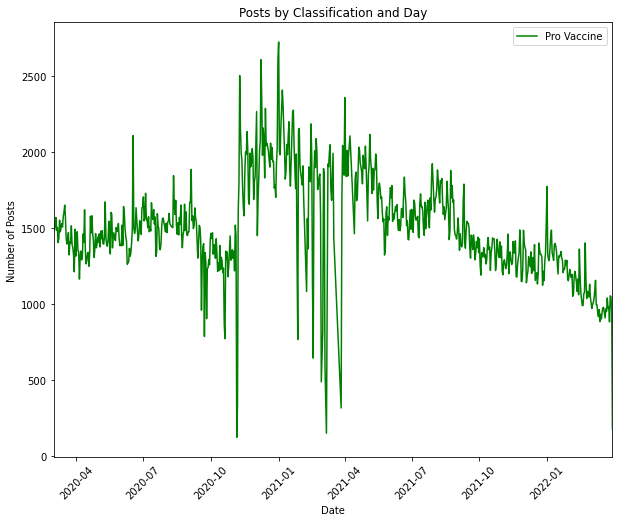

In [17]:
plt.figure(figsize=(10,8))
# plt.plot(df['Date'], df['Anti_Vax'], label='Anti Vaccine', color='red')
# plt.plot(df['Date'], df['Neutral'], label='Neutral', color='grey')
plt.plot(df['Date'], df['Pro_vax'], label='Pro Vaccine', color='green')
# plt.plot(df2['Date'], df2['total'], label='Total')
plt.ylim=(0,60000)
plt.xlim(datetime(2020, 3,1).date(),datetime(2022, 3,29).date())
plt.xticks(rotation=-45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.title('Posts by Classification and Day')

In [ ]:
df2

In [98]:
df2[df2['Anti_Vax'] == df2["Anti_Vax"].max()]

,Date,Anti_Vax,Neutral,Pro_vax,total
312,2021-01-07,33518.0,23765.0,1296.0,58311.0


In [111]:
df2[(df2['Neutral'] > 30000) & (df2['Date'] < datetime(2022,3,1))]

,Date,Anti_Vax,Neutral,Pro_vax,total
333,2021-01-28,22396.0,53463.0,1299.0,41648.0
334,2021-01-29,21136.0,45309.0,1116.0,39689.0
337,2021-02-01,19404.0,33056.0,1033.0,36830.0
338,2021-02-02,20297.0,33059.0,1137.0,37727.0


In [102]:
df[df['Pro_vax'] == df['Pro_vax'].max()]

,Date,Anti_Vax,Neutral,Pro_vax,total,date
335,2021-01-28,81891.0,53463.0,64516.0,199870.0,335


(array([18353., 18444., 18536., 18628., 18718., 18809., 18901., 18993.,
        19083.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

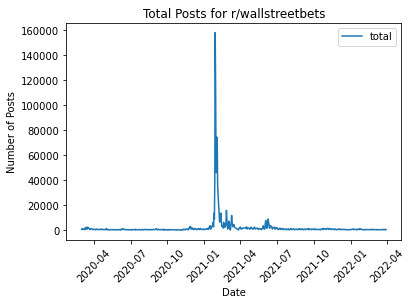

In [85]:

agg.plot('date', 'total')
plt.title("Total Posts for r/wallstreetbets")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)

In [72]:
agg[agg['date'] == datetime(2021,2,3 ).date()]

,date,Anti_Vax,Neutral,Pro_vax,total
339,2021-02-03,15681,9240,12342,37263


In [92]:
len(agg)

742

In [97]:
df2.tail()

,Date,Anti_Vax,Neutral,Pro_vax,total
740,2022-03-27,11109.0,10169.0,682.0,22444.0
741,2022-03-28,14612.0,13798.0,1015.0,29757.0
742,2022-03-29,NaN,11674.0,989.0,26863.0
743,2022-03-30,NaN,10516.0,971.0,24773.0
744,2022-03-31,NaN,501.0,216.0,1795.0


In [98]:
agg.tail()

,date,Anti_Vax,Neutral,Pro_vax,total
737,2022-03-26,277,81,124,482
738,2022-03-27,210,57,68,335
739,2022-03-28,377,134,147,658
740,2022-03-29,484,166,196,846
741,2022-03-30,332,92,152,576


In [93]:
len(df2)

743

In [86]:
df2['Anti_Vax'] = df2['Anti_Vax'] - agg['Anti_Vax']

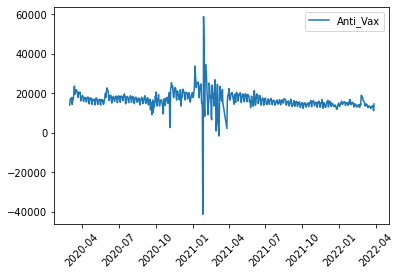

In [89]:
plt.plot(df2['Date'], df2['Anti_Vax'], label='Anti_Vax')
plt.xticks(rotation=45)
plt.legend()

In [91]:
df2[df2['Anti_Vax'] <0]

,Date,Anti_Vax,Neutral,Pro_vax,total
333,2021-01-26,-41322.0,13258.0,3126.0,34557.0
334,2021-01-27,-22155.0,15840.0,16512.0,56240.0
368,2021-03-07,-1652.0,1526.0,137.0,3542.0


## Comments

In [131]:
dfc = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Comments/date_db.csv')

In [137]:
dfc.head()

,Date,Anti_Vax,Neutral,score.2
2,2020-03-01,12345.0,4524.0,567.0
3,2020-03-02,13701.0,4681.0,665.0
4,2020-03-03,14533.0,5167.0,625.0
5,2020-03-04,15864.0,5185.0,657.0
6,2020-03-05,14459.0,4873.0,591.0


In [133]:
dfc= dfc.drop([0,1],axis=0)

In [138]:
dfc.rename(columns={'Unnamed: 0':'Date', 'score': 'Anti_Vax', 'score.1': 'Neutral', 'score.2': 'Pro_vax'}, inplace=True)

In [135]:
dfc['Date'] = pd.to_datetime(dfc['Date'])

In [139]:
dfc['total'] = dfc['Anti_Vax'] + dfc['Neutral'] + dfc['Pro_vax']

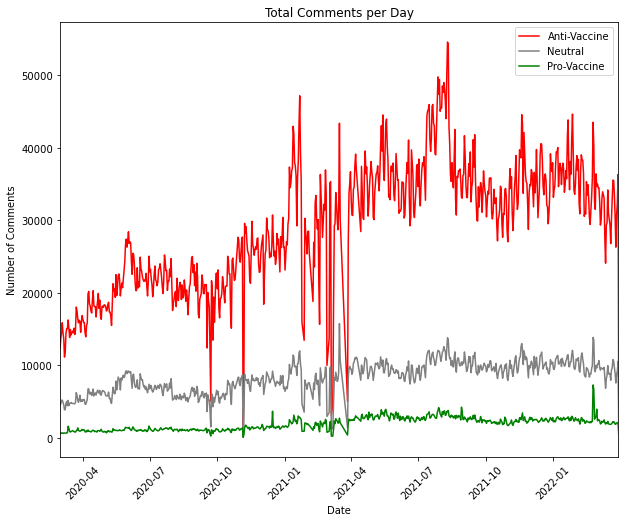

In [146]:

plt.figure(figsize=(10,8))
# plt.plot(dfc['Date'], dfc['total'], label='Total Comments', color='blue')
plt.plot(dfc['Date'], dfc['Anti_Vax'], label='Anti-Vaccine', color='red')
plt.plot(dfc['Date'], dfc['Neutral'], label='Neutral', color='grey')
plt.plot(dfc['Date'], dfc['Pro_vax'], label='Pro-Vaccine', color='green')
# plt.plot(agg['date'], agg['total'], label='r/WallStreetBets')
plt.title('Total Comments per Day')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xlim((datetime(2020,3,1).date(), datetime(2022,3,30).date()))
plt.xticks(rotation=45)
plt.legend()

In [149]:
dfc[(dfc["Anti_Vax"] > 45000)]

,Date,Anti_Vax,Neutral,Pro_vax,total
328,2021-01-21,47186.0,11982.0,2821.0,61989.0
480,2021-07-14,45106.0,11782.0,3283.0,60171.0
481,2021-07-15,45318.0,12023.0,3339.0,60680.0
482,2021-07-16,45968.0,12042.0,3576.0,61586.0
486,2021-07-20,45760.0,11611.0,3194.0,60565.0
487,2021-07-21,45994.0,11812.0,3237.0,61043.0
493,2021-07-27,45947.0,11559.0,3418.0,60924.0
494,2021-07-28,49791.0,12055.0,3758.0,65604.0
495,2021-07-29,47407.0,12016.0,4160.0,63583.0
496,2021-07-30,49417.0,11870.0,3869.0,65156.0


In [157]:
dfc[dfc["Pro_vax"] == dfc["Pro_vax"].max()]

,Date,Anti_Vax,Neutral,Pro_vax,total
705,2022-02-24,43538.0,13842.0,7285.0,64665.0
